In [0]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import resnet_v2

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import ResNet101V2

base_model= ResNet101V2(weights='imagenet', include_top=False,input_shape=(32, 32, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)

preds = Dense(10, activation = 'softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)


In [56]:
new_model=model
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [57]:
for i,layer in enumerate(new_model.layers):
  print(i,layer.name, layer.trainable)

0 input_4 True
1 conv1_pad True
2 conv1_conv True
3 pool1_pad True
4 pool1_pool True
5 conv2_block1_preact_bn True
6 conv2_block1_preact_relu True
7 conv2_block1_1_conv True
8 conv2_block1_1_bn True
9 conv2_block1_1_relu True
10 conv2_block1_2_pad True
11 conv2_block1_2_conv True
12 conv2_block1_2_bn True
13 conv2_block1_2_relu True
14 conv2_block1_0_conv True
15 conv2_block1_3_conv True
16 conv2_block1_out True
17 conv2_block2_preact_bn True
18 conv2_block2_preact_relu True
19 conv2_block2_1_conv True
20 conv2_block2_1_bn True
21 conv2_block2_1_relu True
22 conv2_block2_2_pad True
23 conv2_block2_2_conv True
24 conv2_block2_2_bn True
25 conv2_block2_2_relu True
26 conv2_block2_3_conv True
27 conv2_block2_out True
28 conv2_block3_preact_bn True
29 conv2_block3_preact_relu True
30 conv2_block3_1_conv True
31 conv2_block3_1_bn True
32 conv2_block3_1_relu True
33 conv2_block3_2_pad True
34 conv2_block3_2_conv True
35 conv2_block3_2_bn True
36 conv2_block3_2_relu True
37 max_pooling2d_9 Tr

In [0]:
for layer in new_model.layers[:30]:
    layer.trainable=False
for layer in new_model.layers[30:]:
    layer.trainable=True

In [0]:
# select tensorflow 2 in colab
%tensorflow_version 2.x

# install tensorflow 2 and tensorflow datasets on a personal machine
# !pip install tensorflow-gpu
# !pip install tensorflow-datasets

# tenorflow
import tensorflow as     tf
from   tensorflow import keras

# tensorflow datasets
import tensorflow_datasets as tfds

# additional libraries
import math
import numpy             as np
import matplotlib.pyplot as plt
# %matplotlib inline

# version check
# print(tf.__version__)
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import scipy.io as sio
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [60]:
train_data = sio.loadmat('/content/drive/My Drive/Data/train_32x32.mat')
test_data = sio.loadmat('/content/drive/My Drive/Data/test_32x32.mat')
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)
Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)



In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [65]:
X_train

array([[[[0.12941177, 0.11764706, 0.14901961],
         [0.05882353, 0.09019608, 0.07450981],
         [0.05882353, 0.06666667, 0.07450981],
         ...,
         [0.28235295, 0.25490198, 0.21960784],
         [0.32156864, 0.3019608 , 0.22352941],
         [0.34901962, 0.30980393, 0.23137255]],

        [[0.10980392, 0.15294118, 0.13725491],
         [0.05490196, 0.09803922, 0.08627451],
         [0.05490196, 0.07843138, 0.06666667],
         ...,
         [0.15686275, 0.15294118, 0.19607843],
         [0.2627451 , 0.22745098, 0.20392157],
         [0.3254902 , 0.30588236, 0.23529412]],

        [[0.15686275, 0.16078432, 0.14901961],
         [0.07058824, 0.08235294, 0.10196079],
         [0.0627451 , 0.06666667, 0.09019608],
         ...,
         [0.09019608, 0.11372549, 0.1764706 ],
         [0.13725491, 0.16470589, 0.17254902],
         [0.28235295, 0.27058825, 0.20784314]],

        ...,

        [[0.3372549 , 0.31764707, 0.29411766],
         [0.34117648, 0.32156864, 0.2784314 ]

In [66]:
SUBTRACT_PIXEL_MEAN = True
if SUBTRACT_PIXEL_MEAN:
    X_train_mean = np.mean(X_train, axis=0)
    X_train -= X_train_mean
    X_test -= X_train_mean

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('y_train shape:', X_train.shape)

x_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples
y_train shape: (73257, 32, 32, 3)


In [67]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [68]:

#new_model = change_model(model,new_input_shape=(None, 32,32, 3))

new_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [69]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
t1 = datetime.now()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=6, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="/content/drive/My Drive/Data/weights.best.resnet101.hdf5", verbose=0, save_best_only=True) 
history = new_model.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
new_model.load_weights('/content/drive/My Drive/Data/weights.best.resnet101.hdf5') 
train_time = datetime.now() - t1

Epoch 1/1000
2290/2290 - 144s - loss: 2.2457 - accuracy: 0.1886 - val_loss: 2.2171 - val_accuracy: 0.1959
Epoch 2/1000
2290/2290 - 144s - loss: 2.0254 - accuracy: 0.2588 - val_loss: 2.0703 - val_accuracy: 0.2381
Epoch 3/1000
2290/2290 - 145s - loss: 1.6286 - accuracy: 0.4196 - val_loss: 1.1955 - val_accuracy: 0.5937
Epoch 4/1000
2290/2290 - 146s - loss: 1.0187 - accuracy: 0.6600 - val_loss: 1.0220 - val_accuracy: 0.6789
Epoch 5/1000
2290/2290 - 145s - loss: 0.7150 - accuracy: 0.7833 - val_loss: 0.6190 - val_accuracy: 0.8286
Epoch 6/1000
2290/2290 - 144s - loss: 0.5728 - accuracy: 0.8371 - val_loss: 0.5974 - val_accuracy: 0.8345
Epoch 7/1000
2290/2290 - 144s - loss: 0.4778 - accuracy: 0.8647 - val_loss: 0.4492 - val_accuracy: 0.8682
Epoch 8/1000
2290/2290 - 144s - loss: 0.5709 - accuracy: 0.8540 - val_loss: 0.4449 - val_accuracy: 0.8716
Epoch 9/1000
2290/2290 - 144s - loss: 0.4004 - accuracy: 0.8880 - val_loss: 0.4213 - val_accuracy: 0.8858
Epoch 10/1000
2290/2290 - 144s - loss: 0.3836 

In [70]:
X_test.shape,y_test.shape,y_train.shape

((26032, 32, 32, 3), (26032, 10), (73257, 10))

In [71]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

814/814 [==============================] - 16s 19ms/step - loss: 0.3242 - accuracy: 0.9098
Test loss: 0.3241676092147827
Test accuracy: 0.9098033308982849


In [72]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test, axis = 1)
print(y_test)

[5 2 1 ... 7 6 7]
[5 2 1 ... 7 6 7]


In [73]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9098033189920098

In [74]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 0.9104722082619287


In [75]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 0.9098033189920098


In [76]:
score = metrics.f1_score(y_test,  y_pred, average= "weighted")
print("F1-score: {}".format(score))


F1-score: 0.9097084591020544


In [0]:
classification = metrics.classification_report(y_test, y_pred)
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
print(confusion_matrix)
print(classification)
print(accuracy)


<function confusion_matrix at 0x7f12ac7432f0>
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1744
           1       0.92      0.95      0.94      5099
           2       0.96      0.94      0.95      4149
           3       0.87      0.85      0.86      2882
           4       0.94      0.93      0.94      2523
           5       0.91      0.90      0.91      2384
           6       0.89      0.87      0.88      1977
           7       0.90      0.94      0.92      2019
           8       0.90      0.81      0.85      1660
           9       0.82      0.91      0.86      1595

    accuracy                           0.91     26032
   macro avg       0.90      0.90      0.90     26032
weighted avg       0.91      0.91      0.91     26032

0.9098033189920098


In [0]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[1593   43   14   11    1    5   15   16   15   31]
 [  25 4839   28   27   71   13   15   72    6    3]
 [   6   54 3882   45   20   10    5   95   10   22]
 [  15   71   29 2447   11   50   29   15   56  159]
 [   5   75   19   17 2351    7   14    4    8   23]
 [   7   15   11   89    5 2156   44    4   15   38]
 [  36   25    5   32   13  100 1715    6   36    9]
 [   5   73   21    9    3    5    0 1897    1    5]
 [  36   17    8   95    9   14   93    2 1347   39]
 [  24   23   28   27    7    8    6    5   10 1457]]
Plotting confusion matrix


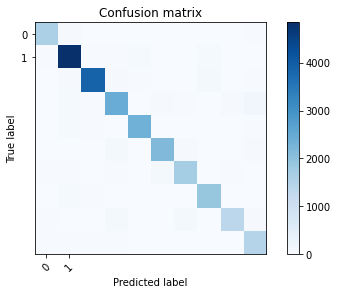

In [80]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()

In [0]:
prediction_array = model.predict(X_test)
predicted_class = np.argmax(prediction_array, axis=1)


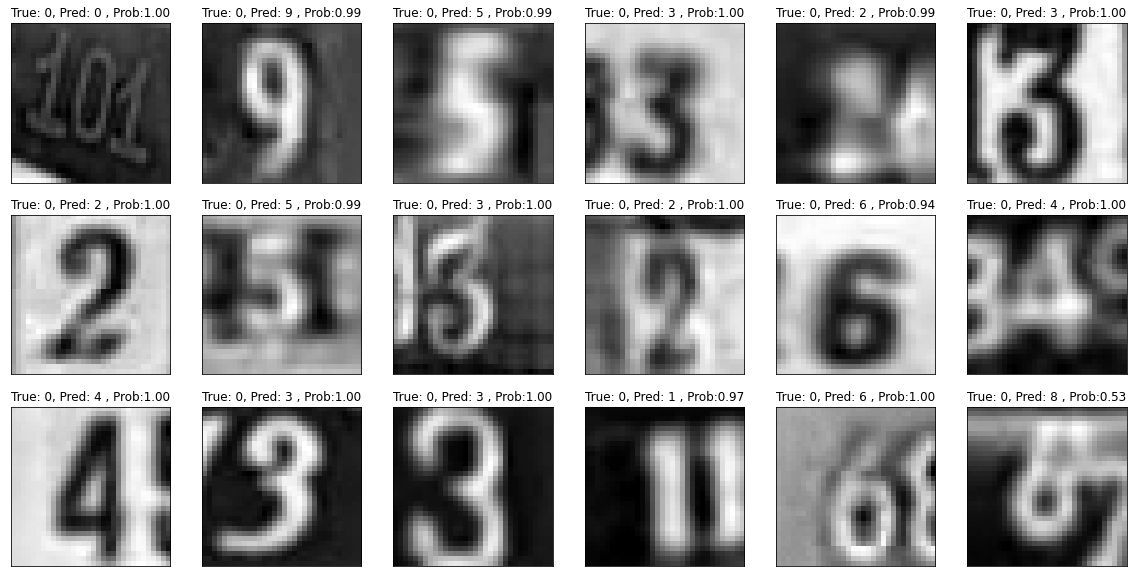

In [82]:
def plot_predicted_label(images, nrows, ncols, cls_true, cls_pred,prediction_array):
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 10))
    
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    for i, ax in zip(rs, axes.flat):
        prob = round(prediction_array[i][cls_pred[i]],2)
        title = 'True: %s, Pred: %s , Prob:%0.2f' % (np.argmax(cls_true[i]),cls_pred[i],prob)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])


# ploat image with predicted and actual value
num_rows = 3
num_cols = 6
plot_predicted_label(X_test,num_rows, num_cols, y_test,predicted_class,prediction_array);